In [12]:
from pydrawnet.renderers import SeqRenderer, FreeformRenderer
from pydrawnet import layers, operations
import math
import matplotlib.pyplot as plt

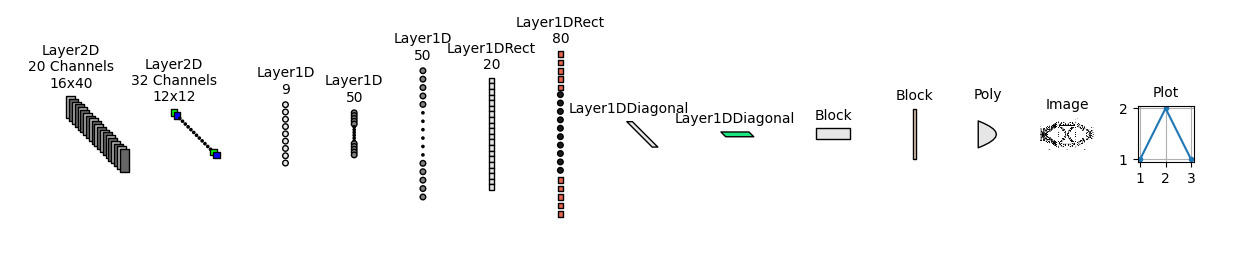

In [6]:
""" Demonstrating examples of each type of layer """

SR = SeqRenderer()
SR.make_figure()

kernel = (8, 16)
SR.add_layer(layers.Layer2D(20, 16, 40, "Layer2D", cspace=5))
SR.add_layer(
    layers.Layer2D(
        32,
        12,
        12,
        "Layer2D",
        limited=16,
        end_channels=2,
        limited_radius=2,
        skip_ival=1,
        cspace=5,
        color_dark=(0, 0, 1),
        color_light=(0, 1, 0),
    )
)
SR.add_layer(layers.Layer1D(9, 10, "Layer1D", shape_spacing=3))
SR.add_layer(
    layers.Layer1D(
        50,
        10,
        "Layer1D",
        shape_spacing=-5,
        limited=16,
        limited_radius=2,
        fill_color=(0.5, 0.5, 0.5),
    )
)
SR.add_layer(
    layers.Layer1D(
        50,
        10,
        "Layer1D",
        shape_spacing=5,
        limited=16,
        limited_radius=2,
        fill_color=(0.5, 0.5, 0.5),
    )
)
SR.add_layer(layers.Layer1DRect(20, 10, 10, "Layer1DRect"))
SR.add_layer(
    layers.Layer1DRect(
        80,
        10,
        10,
        "Layer1DRect",
        limited=20,
        shape_spacing=5,
        fill_color=(0.9, 0.4, 0.3),
    )
)
SR.add_layer(layers.Layer1DDiagonal(10, 64, "Layer1DDiagonal"))
SR.add_layer(
    layers.Layer1DDiagonal(50, 12, "Layer1DDiagonal", fill_color=(0.1, 0.9, 0.5))
)
SR.add_layer(layers.BlockLayer(60, 20))
SR.add_layer(layers.BlockLayer(5, 90, fill_color=(0.9, 0.8, 0.7)))

X = [100 * math.cos(-0.5 + i / 10) ** 3 - 70 for i in range(11)]
Y = [50 * math.sin(-0.5 + i / 10) for i in range(11)]
SR.add_layer(layers.PolyLayer(list(zip(X, Y))))

SR.add_layer(layers.ImageLayer("dense_example.png", 100, 60))

tmp = layers.PlotLayer(SR.axs)
tmp.axs.plot([1, 2, 3], [1, 2, 1], ".-")
tmp.axs.grid()
SR.add_layer(tmp)

plt.gcf().set_size_inches(16, 5)
SR.render(75, 150, ymargin=0.25)

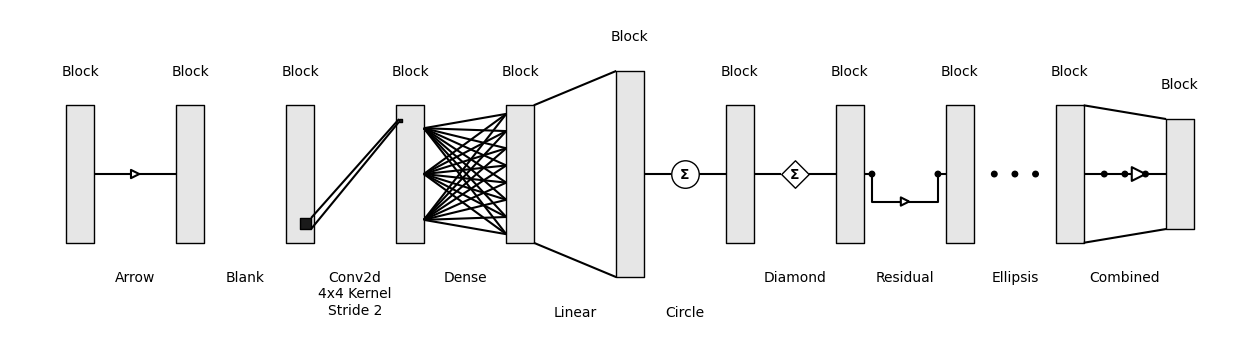

In [28]:
""" Demonstrating examples of each type of operation """

SR = SeqRenderer()

SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(operations.ArrowOp())
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(operations.BlankOp())
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(operations.Conv2dOp())
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(operations.DenseOp(3, 8))
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(operations.LinearOp())
SR.add_layer(layers.BlockLayer(10, 75))
SR.add_operation(
    operations.CircleOp(diameter=10, symbol="Σ", symbol_kwargs={"weight": "bold"})
)
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(
    operations.DiamondOp(
        width=10, height=10, symbol="Σ", symbol_kwargs={"weight": "bold"}
    )
)
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(operations.ResidualOp(show_hori_segments=True))
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation(operations.EllipsisOp(diameter=2, fill_color=(0, 0, 0)))
SR.add_layer(layers.BlockLayer(10, 50))
SR.add_operation([operations.LinearOp("Combined"), 
                  operations.ArrowOp("", arrow_size=5, arrow_offset=5), 
                  operations.EllipsisOp("", diameter=2, fill_color=(0, 0, 0)),
                  ])
SR.add_layer(layers.BlockLayer(10, 40))

SR.make_figure()
plt.gcf().set_size_inches(16, 5)
SR.render(20)


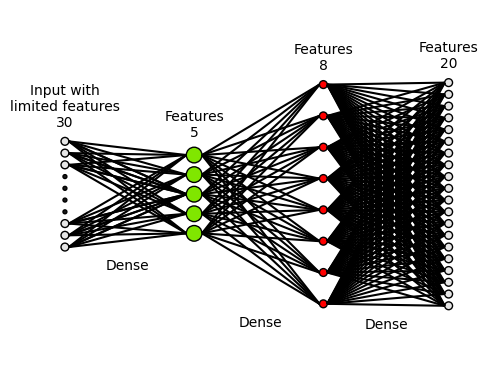

In [11]:
""" Demonstrating a generic Dense/Linear network with some of the available parameter variations """

SR = SeqRenderer()
SR.add_layer(
    layers.Layer1D(
        30,
        1,
        "Input with\nlimited features",
        shape_spacing=0.5,
        limited=10,
        limited_radius=0.25,
        end_features=3,
    )
)
SR.add_operation(operations.DenseOp(10, 5, "Dense", limited_ends=3))
SR.add_layer(
    layers.Layer1D(5, 2, "Features", shape_spacing=0.5, fill_color=(0.5, 0.9, 0))
)
SR.add_operation(operations.DenseOp(5, 8, "Dense"))
SR.add_layer(layers.Layer1D(8, 1, "Features", shape_spacing=3, fill_color=(1, 0, 0)))
SR.add_operation(operations.DenseOp(8, 20, "Dense"))
SR.add_layer(layers.Layer1D(20, 1, "Features", shape_spacing=0.5))

SR.render(10, text_y_offset=1)

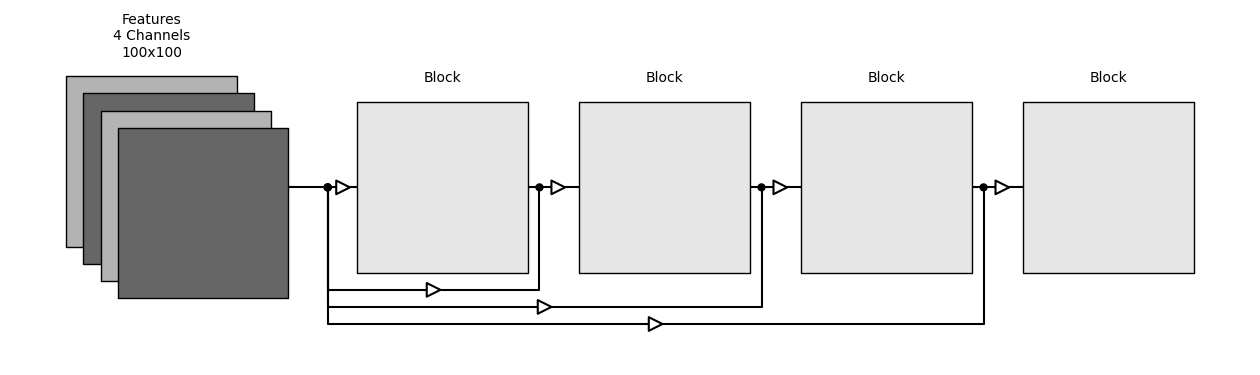

In [34]:
""" Demonstrating residual operations using the Freeform Renderer """

FR = FreeformRenderer()

arrow_size = 8
hival = 130

X = 0
FR.add_layer(layers.Layer2D(4), "A")
X += hival + 40
FR.add_layer(layers.BlockLayer(X=X), "B")
X += hival
FR.add_layer(layers.BlockLayer(X=X), "C")
X += hival
FR.add_layer(layers.BlockLayer(X=X), "D")
X += hival
FR.add_layer(layers.BlockLayer(X=X), "E")

FR.add_operation(
    operations.ArrowOp("", arrow_size=arrow_size, arrow_offset=12), "A", "B"
)
FR.add_operation(
    operations.ArrowOp("", arrow_size=arrow_size, arrow_offset=3), "B", "C"
)
FR.add_operation(
    operations.ArrowOp("", arrow_size=arrow_size, arrow_offset=3), "C", "D"
)
FR.add_operation(
    operations.ArrowOp("", arrow_size=arrow_size, arrow_offset=3), "D", "E"
)

FR.add_operation(
    operations.ResidualOp(
        "", yoffset=-60, xoffset=23, arrow_size=arrow_size, connection_radius=2
    ),
    "A",
    "C",
)
FR.add_operation(
    operations.ResidualOp(
        "", yoffset=-70, xoffset=23, arrow_size=arrow_size, connection_radius=2
    ),
    "A",
    "D",
)
FR.add_operation(
    operations.ResidualOp(
        "", yoffset=-80, xoffset=23, arrow_size=arrow_size, connection_radius=2
    ),
    "A",
    "E",
)

FR.make_figure()
plt.gcf().set_size_inches(16, 5)
FR.render()

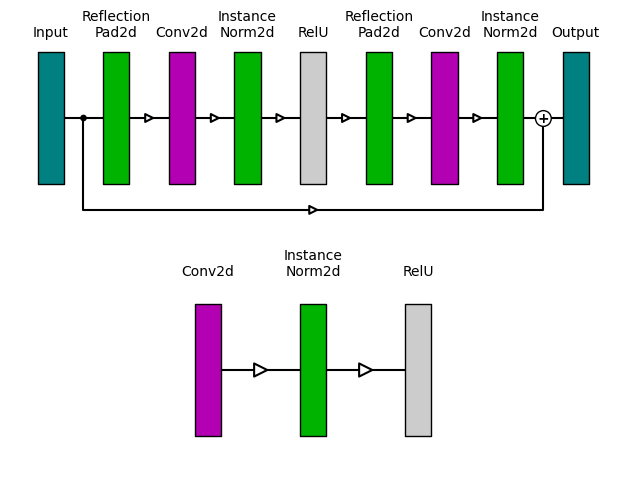

In [35]:
""" Demonstrating multiple networks using a pre-defined plot """

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(8, 6)
axs = fig.axes

# ------------ PART 1 ------------

FR = FreeformRenderer(axs[0])
arrow_size = 3
hival = 25

labels = [
    "Input",
    "Reflection\nPad2d",
    "Conv2d",
    "Instance\nNorm2d",
    "RelU",
    "Reflection\nPad2d",
    "Conv2d",
    "Instance\nNorm2d",
    "Output",
]

colors = [
    (0, 0.5, 0.5),
    (0, 0.7, 0),
    (0.7, 0, 0.7),
    (0, 0.7, 0),
    (0.8, 0.8, 0.8),
    (0, 0.7, 0),
    (0.7, 0, 0.7),
    (0, 0.7, 0),
    (0, 0.5, 0.5),
]

abet = "ABCDEFGHIJKLMNOPQRSTUVQXYZ"

X = 0
for i, L in enumerate(labels):
    FR.add_layer(layers.BlockLayer(10, 50, X=X, label=L, fill_color=colors[i]), abet[i])
    X += hival
    if i > 0 and i < len(labels) - 2:
        FR.add_operation(
            operations.ArrowOp("", arrow_size=arrow_size), abet[i], abet[i + 1]
        )

FR.add_operation(operations.ArrowOp("", arrow_size=0), "A", "B")

FR.add_operation(
    operations.ResidualOp("", yoffset=-35, xoffset=7.5, arrow_size=arrow_size),
    "A",
    "I",
)

FR.add_operation(
    operations.CircleOp("", diameter=6, symbol_kwargs={"weight": "bold"}), "H", "I"
)

FR.render(text_y_offset=5, show=False)

# ------------ PART 2 ------------

SR = SeqRenderer(axs[1])

labels = [
    "Conv2d",
    "Instance\nNorm2d",
    "RelU",
]

colors = [
    (0.7, 0, 0.7),
    (0, 0.7, 0),
    (0.8, 0.8, 0.8),
]

for i, L in enumerate(labels):
    SR.add_layer(layers.BlockLayer(10, 50, label=L, fill_color=colors[i]))
    if i < len(labels) - 1:
        SR.add_operation(operations.ArrowOp("", 5))

SR.render(20)


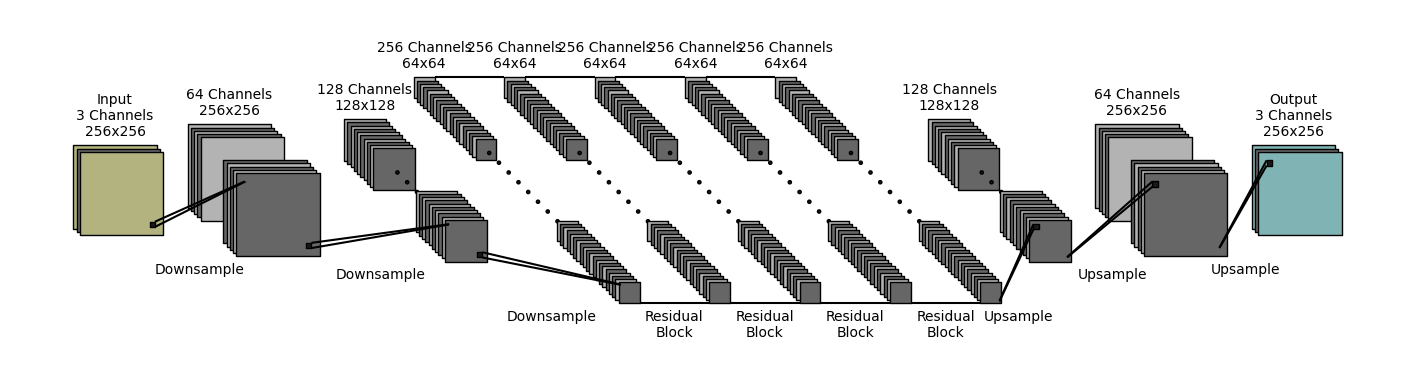

In [19]:
""" Demonstrating a ResNet style network using residual operations """

SR = SeqRenderer()

abet = "ABCDEFGHIJKLMNOP"

SR.add_layer(layers.Layer2D(3, 256, 256, "Input", color_light=(0.7, 0.7, 0.5)))
SR.add_layer(layers.Layer2D(64, 256, 256, "", limited=16, end_channels=5))
SR.add_layer(layers.Layer2D(128, 128, 128, "", limited=32, end_channels=10))
SR.add_layer(layers.Layer2D(256, 64, 64, "", limited=64, end_channels=20))
SR.add_layer(layers.Layer2D(256, 64, 64, "", limited=64, end_channels=20))
SR.add_layer(layers.Layer2D(256, 64, 64, "", limited=64, end_channels=20))
SR.add_layer(layers.Layer2D(256, 64, 64, "", limited=64, end_channels=20))
SR.add_layer(layers.Layer2D(256, 64, 64, "", limited=64, end_channels=20))
SR.add_layer(layers.Layer2D(128, 128, 128, "", limited=32, end_channels=10))
SR.add_layer(layers.Layer2D(64, 256, 256, "", limited=16, end_channels=5))
SR.add_layer(layers.Layer2D(3, 256, 256, "Output", color_light=(0.5, 0.7, 0.7)))

SR.add_operation(operations.Conv2dOp((16, 16), label="Downsample", label_only=True))
SR.add_operation(operations.Conv2dOp((16, 16), label="Downsample", label_only=True))
SR.add_operation(operations.Conv2dOp((16, 16), label="Downsample", label_only=True))
SR.add_operation(operations.LinearOp("Residual\nBlock"))
SR.add_operation(operations.LinearOp("Residual\nBlock"))
SR.add_operation(operations.LinearOp("Residual\nBlock"))
SR.add_operation(operations.LinearOp("Residual\nBlock"))
SR.add_operation(
    operations.Conv2dOp((16, 16), label="Upsample", label_only=True, reverse=True)
)
SR.add_operation(
    operations.Conv2dOp((16, 16), label="Upsample", label_only=True, reverse=True)
)
SR.add_operation(
    operations.Conv2dOp((16, 16), label="Upsample", label_only=True, reverse=True)
)

SR.make_figure()
plt.gcf().set_size_inches(18, 7)
SR.render(75, 150, text_y_offset=20)


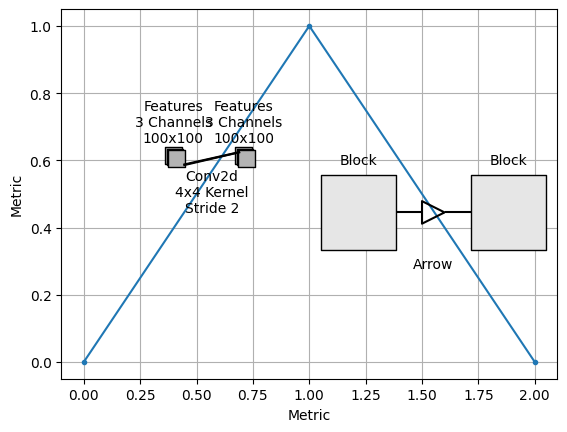

In [21]:
""" Demonstrating adding visualizations within plots """

fig, ax = plt.subplots()
axs = fig.axes

axs[0].plot([0, 1, 2], [0, 1, 0], ".-")
axs[0].grid()
axs[0].set_xlabel("Metric")
axs[0].set_ylabel("Metric")

subax1 = axs[0].inset_axes([0.2, 0.5, 0.2, 0.2])
subax2 = axs[0].inset_axes([0.5, 0.2, 0.5, 0.5])

# Subplot 1
SR = SeqRenderer(subax1)

SR.add_layer(layers.Layer2D())
SR.add_operation(operations.Conv2dOp())
SR.add_layer(layers.Layer2D())

SR.render(200, show=False)

# Subplot 2
SR = SeqRenderer(subax2)

SR.add_layer(layers.BlockLayer())
SR.add_operation(operations.ArrowOp(arrow_size=30))
SR.add_layer(layers.BlockLayer())

SR.render()